In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from IPython.core.display import display, HTML

from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import Counter


In [3]:
df = pd.read_csv("data/df_story_features_Jul29.csv")

In [494]:
# Print columns
# df.columns.tolist()

# display(HTML(df.head(1).to_html()))

# Generate binary dependent variable (for logit)

In [4]:
df['isPopular'] = (df['ClapCount_Story'] < df['ClapCount_Story'].median()).astype(int)

# Split train / test (80/20)

In [5]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

,Unnamed: 0,ClapCount_Card,ClapCount_Story,Company,CompanyURL,PostID,PublishedDate,ReadingTime,ResponseNum_Card,ResponseNum_Story,StoryIndex,StoryTitle,StoryURL,StoryURL_Story,Tag1,Tag2,Tag3,Tag4,Tag5,TagSource,User,UserURL,VoterCount,isPaywall,TagNum,isPublication,Text,SentimentPolarity,SentimentSubjectivity,WordNum,TextSyllableNum,TextLexiconNum,TextSentenceNum,ReadabilityFleschEase,ReadabilitySMOG,ReadabilityFleschKincaid,ReadabilityColemanLiau,ReadabilityARI,ReadabilityDaleChall,ReadabilityDifficultWordsList,ReadabilityDifficultWordsNum,ReadabilityLinsearWriteFormula,ReadabilityGunningFog,ReadabilityReadingTime,ReadabilityConsensus,HasFeaturedImage,CodeInlineRaw,CodeInlineNum,CodeBlockRaw,CodeBlockNum,CodeBlockLengthList,CodeBlockLengthSum,CodeBlockLengthMedian,CodeBlockLengthMean,CodeBlockLengthStd,CodeBlockLengthMin,CodeBlockLengthMax,ListOlNum,ListOlLength,ListOlSum,ListOlMedian,ListOlMean,ListOlStd,ListOlMin,ListOlMax,ListUlNum,ListUlLength,ListUlSum,ListUlMedian,ListUlMean,ListUlStd,ListUlMin,ListUlMax,ImgNum,LinkURLList,LinkNum,HLightTextList,HlightNum,ParagraphNum,ItalicNum,BoldNum,AuthorArticlesClap_mean,AuthorArticlesClap_median,AuthorArticlesClap_count,AuthorArticlesClap_sum,AuthorArticlesResponse_mean,AuthorArticlesResponse_median,AuthorArticlesResponse_count,AuthorArticlesResponse_sum,AuthorArticlesVoter_mean,AuthorArticlesVoter_median,AuthorArticlesVoter_count,AuthorArticlesVoter_sum,Tag1Clap_mean,Tag1Clap_median,Tag1Clap_count,Tag1Clap_sum,Tag1Clap_std,Tag1Response_mean,Tag1Response_median,Tag1Response_count,Tag1Response_sum,Tag1Response_std,Tag1ReadingTime_mean,Tag1ReadingTime_median,Tag1ReadingTime_count,Tag1ReadingTime_sum,Tag1ReadingTime_std,Tag2Clap_mean,Tag2Clap_median,Tag2Clap_count,Tag2Clap_sum,Tag2Clap_std,Tag2Response_mean,Tag2Response_median,Tag2Response_count,Tag2Response_sum,Tag2Response_std,Tag2ReadingTime_mean,Tag2ReadingTime_median,Tag2ReadingTime_count,Tag2ReadingTime_sum,Tag2ReadingTime_std,Tag3Clap_mean,Tag3Clap_median,Tag3Clap_count,Tag3Clap_sum,Tag3Clap_std,Tag3Response_mean,Tag3Response_median,Tag3Response_count,Tag3Response_sum,Tag3Response_std,Tag3ReadingTime_mean,Tag3ReadingTime_median,Tag3ReadingTime_count,Tag3ReadingTime_sum,Tag3ReadingTime_std,Tag4Clap_mean,Tag4Clap_median,Tag4Clap_count,Tag4Clap_sum,Tag4Clap_std,Tag4Response_mean,Tag4Response_median,Tag4Response_count,Tag4Response_sum,Tag4Response_std,Tag4ReadingTime_mean,Tag4ReadingTime_median,Tag4ReadingTime_count,Tag4ReadingTime_sum,Tag4ReadingTime_std,Tag5Clap_mean,Tag5Clap_median,Tag5Clap_count,Tag5Clap_sum,Tag5Clap_std,Tag5Response_mean,Tag5Response_median,Tag5Response_count,Tag5Response_sum,Tag5Response_std,Tag5ReadingTime_mean,Tag5ReadingTime_median,Tag5ReadingTime_count,Tag5ReadingTime_sum,Tag5ReadingTime_std,PublicationClap_mean,PublicationClap_median,PublicationClap_count,PublicationClap_sum,PublicationReadingTime_mean,PublicationReadingTime_median,PublicationReadingTime_count,PublicationReadingTime_sum,PublicationVoter_mean,PublicationVoter_median,PublicationVoter_count,PublicationVoter_sum,PublicationisPaywall_mean,PublicationisPaywall_median,PublicationisPaywall_count,PublicationisPaywall_sum,TagUseSum,TagUseMean,TagUseMedian,TagClapSum,TagClapMean,TagClapMedian,isPopular
1036,1036,0,0.0,0,0,5b727a97d473,2018-12-17,2,0,0.0,9559,Design Pattern: AbstractÂ Factory,https://medium.com/@JamesLouie12/design-patter...,https://medium.com/@JamesLouie12/design-patter...,programming,0,0,0,0,programming,James Louie,https://medium.com/@JamesLouie12,0.0,False,1,False,[Intent: Provide an interface for creating fam...,0.085652,0.448586,328,605,328,6,-0.98,24.5,27.0,17.19,33.8,10.06,"['diverse', 'consequencesisolates', 'published...",77,14.6,27.37,28.59,27.0,False,[],0,[],0,[],0,0.0,0.0,0.0,0,0,1,[668],668,668.0,668.0,0.0,668,668,3,"[340, 362, 147]",849,340.0,283.0,96.585023,147,362,0,['https://jameslouiecs.blogspot.com/2017/09/de...,1,[],0,8,8,6,3.407407,0.0,27,92.0,0.407407,0.0,27,11.0,0.0,0.0,27,0.0,199.395395,4.0,116003.0,23130464

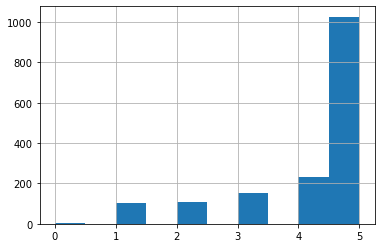

In [22]:
train.sample(1)
train['TagNum'].hist()

In [23]:
xFeatures = ['isPaywall', 'isPublication', 'WordNum', 'SentimentPolarity', 'SentimentSubjectivity',  "TextSyllableNum",
          "TextLexiconNum", "TextSentenceNum", "ReadabilityFleschEase", "ReadabilitySMOG", "ReadabilityFleschKincaid", "ReadabilityColemanLiau", "ReadabilityARI", "ReadabilityDaleChall", "ReadabilityDifficultWordsNum", "ReadabilityLinsearWriteFormula", "ReadabilityGunningFog", "ReadabilityReadingTime", "ReadabilityConsensus", 
        'ReadingTime', 'HasFeaturedImage', 'CodeInlineNum', 'TagNum',
        'CodeBlockNum', 'CodeBlockLengthSum', 'CodeBlockLengthMedian', 'CodeBlockLengthMean',
        'CodeBlockLengthStd', 'CodeBlockLengthMin', 'CodeBlockLengthMax',
        'ListOlNum', 'ListOlSum', 'ListOlMedian', 'ListOlMean', 'ListOlStd', 'ListOlMin', 'ListOlMax', 
        'ListUlNum', 'ListUlSum', 'ListUlMedian', 'ListUlMean', 'ListUlStd', 'ListUlMin', 'ListUlMax', 
        'ImgNum', 'LinkNum',
        'HlightNum', 'ParagraphNum', 'ItalicNum', 'BoldNum', 
#         'AuthorArticlesClap_mean','AuthorArticlesClap_median','AuthorArticlesClap_count','AuthorArticlesClap_sum',
        'AuthorArticlesResponse_mean','AuthorArticlesResponse_median','AuthorArticlesResponse_sum',
        'AuthorArticlesVoter_mean','AuthorArticlesVoter_median','AuthorArticlesVoter_sum',
        
        'TagUseSum', 'TagUseMean',
        'TagUseSum', 'TagUseMean', 'TagUseMedian', 
        'TagClapSum','TagClapMean', 'TagClapMedian',  
        'PublicationClap_mean','PublicationClap_median','PublicationClap_count','PublicationClap_sum',
        'PublicationReadingTime_mean','PublicationReadingTime_median','PublicationReadingTime_sum',
        'PublicationVoter_mean','PublicationVoter_median','PublicationVoter_sum',
        'PublicationisPaywall_mean','PublicationisPaywall_median','PublicationisPaywall_sum',
        'TagUseSum','TagUseMean','TagUseMedian',
        'TagClapSum','TagClapMean','TagClapMedian']

# yFeatures = 'ClapCount_Story' # For linreg
yFeatures = 'isPopular' # For logreg

xTrain = train[xFeatures]
yTrain = train[yFeatures]

xTest = test[xFeatures]
yTest = test[yFeatures]

,Unnamed: 0,ClapCount_Card,ClapCount_Story,Company,CompanyURL,PostID,PublishedDate,ReadingTime,ResponseNum_Card,ResponseNum_Story,StoryIndex,StoryTitle,StoryURL,StoryURL_Story,Tag1,Tag2,Tag3,Tag4,Tag5,TagSource,User,UserURL,VoterCount,isPaywall,TagNum,isPublication,Text,WordNum,HasFeaturedImage,CodeInlineRaw,CodeInlineNum,CodeBlockRaw,CodeBlockNum,CodeBlockLengthList,CodeBlockLengthSum,CodeBlockLengthMedian,CodeBlockLengthMean,CodeBlockLengthStd,CodeBlockLengthMin,CodeBlockLengthMax,ListOlNum,ListOlLength,ListOlSum,ListOlMedian,ListOlMean,ListOlStd,ListOlMin,ListOlMax,ListUlNum,ListUlLength,ListUlSum,ListUlMedian,ListUlMean,ListUlStd,ListUlMin,ListUlMax,ImgNum,LinkURLList,LinkNum,HLightTextList,HlightNum,ParagraphNum,ItalicNum,BoldNum,AuthorArticlesClap_mean,AuthorArticlesClap_median,AuthorArticlesClap_count,AuthorArticlesClap_sum,AuthorArticlesResponse_mean,AuthorArticlesResponse_median,AuthorArticlesResponse_count,AuthorArticlesResponse_sum,AuthorArticlesVoter_mean,AuthorArticlesVoter_median,AuthorArticlesVoter_count,AuthorArticlesVoter_sum,Tag1Clap_mean,Tag1Clap_median,Tag1Clap_count,Tag1Clap_sum,Tag1Clap_std,Tag2Clap_mean,Tag2Clap_median,Tag2Clap_count,Tag2Clap_sum,Tag2Clap_std,Tag3Clap_mean,Tag3Clap_median,Tag3Clap_count,Tag3Clap_sum,Tag3Clap_std,Tag4Clap_mean,Tag4Clap_median,Tag4Clap_count,Tag4Clap_sum,Tag4Clap_std,Tag5Clap_mean,Tag5Clap_median,Tag5Clap_count,Tag5Clap_sum,Tag5Clap_std,PublicationClap_mean,PublicationClap_median,PublicationClap_count,PublicationClap_sum,PublicationReadingTime_mean,PublicationReadingTime_median,PublicationReadingTime_count,PublicationReadingTime_sum,PublicationVoter_mean,PublicationVoter_median,PublicationVoter_count,PublicationVoter_sum,PublicationisPaywall_mean,PublicationisPaywall_median,PublicationisPaywall_count,PublicationisPaywall_sum,TagUseSum,TagUseMean,TagUseMedian,TagClapSum,TagClapMean,TagClapMedian,isPopular
0,0,2,2,NaN,NaN,f5adff36e2cc,2020-02-04,4,0,0.0,10,How to customize font size in R Markdown docum...,https://medium.com/@HadrienD/how-to-customize-...,https://medium.com/@HadrienD/how-to-customize-...,r-markdown,r,css,NaN,NaN,r-markdown,Hadrien Dykiel,https://medium.com/@HadrienD,2,False,3,False,"[Iâm sitting in the back of the room, squint...",824,True,"['fontsize', 'html_document', 'flexdashboard::...",7,[],0,[],0,0.0,0.000000,0.000000,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,13,['https://rmarkdown.rstudio.com/flexdashboard/...,2,[],0,19,1,2,20.166667,13.5,6,121.0,4.500000,4.0,6,27.0,0.166667,0.0,6,1.0,32.520000,6.0,25.0,813.0,56.950359,17.892097,0.0,658.0,11773.0,65.855514,99.970366,1.0,10056.0,1005302.0,828.941729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10739.0,3579.666667,658.0,1017888.0,339296.0,11773.0,1
1,1,198,198,The Writing Cooperative,https://writingcooperative.com?source=tag_arch...,35c2918e89ba,2018-12-31,5,1 response,1.0,167,The Undeniable Benefits of Creative Writing fo...,https://writingcooperative.com/the-undeniable-...,https://writingcooperative.com/the-undeniable-...,programming,writing,creativity,inspiration,productivity,programming,Piotr Gaczkowski,https://writingcooperative.com/@doomhammerng,25,True,5,True,"[When I first started writing for IOD, my beli...",1092,True,[],0,[],0,[],0,0.0,0.000000,0.000000,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,10,['https://unsplash.com/@grohsfabian?utm_source...,15,[],0,26,5,2,246.736842,85.0,57,14064.0,32.631579,6.0,57,1860.0,0.280702,0.0,57,16.0,199.395395,4.0,116003.0,23130464.0,3427.399320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.627290,1.0,64514.0,6362841.0,877.487250,335.753822,133.0,5037.0,1691192.0,4.708954,4.0,5037.0,23719.0,40.124876,15.0,5037.0,202109.0,0.515585,1.0,5037.0,2597.0,180517.0,36103.400000,90258.5,29493305.0,5898661.0,14746652.5,0
2,2,523,523,Towards Data Science,https://towardsdatascience.com?source=tag_arch...,22232699259f,2018-12-31,4,1 response,1.0,288,Numpy Guide for People In aÂ Hurry,htt

# Investigate distribution of response variable

In [6]:
y.median()
df[['VoterCount']].median()
len(df[df['VoterCount']<2])/len(df)

NameError: name 'y' is not defined

# Check NA columns

In [14]:
pd.set_option('display.max_rows', 1000)
display((df[df['TagNum']==0]))
xTrain.isna().any()

,Unnamed: 0,ClapCount_Card,ClapCount_Story,Company,CompanyURL,PostID,PublishedDate,ReadingTime,ResponseNum_Card,ResponseNum_Story,StoryIndex,StoryTitle,StoryURL,StoryURL_Story,Tag1,Tag2,Tag3,Tag4,Tag5,TagSource,User,UserURL,VoterCount,isPaywall,TagNum,isPublication,Text,SentimentPolarity,SentimentSubjectivity,WordNum,TextSyllableNum,TextLexiconNum,TextSentenceNum,ReadabilityFleschEase,ReadabilitySMOG,ReadabilityFleschKincaid,ReadabilityColemanLiau,ReadabilityARI,ReadabilityDaleChall,ReadabilityDifficultWordsList,ReadabilityDifficultWordsNum,ReadabilityLinsearWriteFormula,ReadabilityGunningFog,ReadabilityReadingTime,ReadabilityConsensus,HasFeaturedImage,CodeInlineRaw,CodeInlineNum,CodeBlockRaw,CodeBlockNum,CodeBlockLengthList,CodeBlockLengthSum,CodeBlockLengthMedian,CodeBlockLengthMean,CodeBlockLengthStd,CodeBlockLengthMin,CodeBlockLengthMax,ListOlNum,ListOlLength,ListOlSum,ListOlMedian,ListOlMean,ListOlStd,ListOlMin,ListOlMax,ListUlNum,ListUlLength,ListUlSum,ListUlMedian,ListUlMean,ListUlStd,ListUlMin,ListUlMax,ImgNum,LinkURLList,LinkNum,HLightTextList,HlightNum,ParagraphNum,ItalicNum,BoldNum,AuthorArticlesClap_mean,AuthorArticlesClap_median,AuthorArticlesClap_count,AuthorArticlesClap_sum,AuthorArticlesResponse_mean,AuthorArticlesResponse_median,AuthorArticlesResponse_count,AuthorArticlesResponse_sum,AuthorArticlesVoter_mean,AuthorArticlesVoter_median,AuthorArticlesVoter_count,AuthorArticlesVoter_sum,Tag1Clap_mean,Tag1Clap_median,Tag1Clap_count,Tag1Clap_sum,Tag1Clap_std,Tag1Response_mean,Tag1Response_median,Tag1Response_count,Tag1Response_sum,Tag1Response_std,Tag1ReadingTime_mean,Tag1ReadingTime_median,Tag1ReadingTime_count,Tag1ReadingTime_sum,Tag1ReadingTime_std,Tag2Clap_mean,Tag2Clap_median,Tag2Clap_count,Tag2Clap_sum,Tag2Clap_std,Tag2Response_mean,Tag2Response_median,Tag2Response_count,Tag2Response_sum,Tag2Response_std,Tag2ReadingTime_mean,Tag2ReadingTime_median,Tag2ReadingTime_count,Tag2ReadingTime_sum,Tag2ReadingTime_std,Tag3Clap_mean,Tag3Clap_median,Tag3Clap_count,Tag3Clap_sum,Tag3Clap_std,Tag3Response_mean,Tag3Response_median,Tag3Response_count,Tag3Response_sum,Tag3Response_std,Tag3ReadingTime_mean,Tag3ReadingTime_median,Tag3ReadingTime_count,Tag3ReadingTime_sum,Tag3ReadingTime_std,Tag4Clap_mean,Tag4Clap_median,Tag4Clap_count,Tag4Clap_sum,Tag4Clap_std,Tag4Response_mean,Tag4Response_median,Tag4Response_count,Tag4Response_sum,Tag4Response_std,Tag4ReadingTime_mean,Tag4ReadingTime_median,Tag4ReadingTime_count,Tag4ReadingTime_sum,Tag4ReadingTime_std,Tag5Clap_mean,Tag5Clap_median,Tag5Clap_count,Tag5Clap_sum,Tag5Clap_std,Tag5Response_mean,Tag5Response_median,Tag5Response_count,Tag5Response_sum,Tag5Response_std,Tag5ReadingTime_mean,Tag5ReadingTime_median,Tag5ReadingTime_count,Tag5ReadingTime_sum,Tag5ReadingTime_std,PublicationClap_mean,PublicationClap_median,PublicationClap_count,PublicationClap_sum,PublicationReadingTime_mean,PublicationReadingTime_median,PublicationReadingTime_count,PublicationReadingTime_sum,PublicationVoter_mean,PublicationVoter_median,PublicationVoter_count,PublicationVoter_sum,PublicationisPaywall_mean,PublicationisPaywall_median,PublicationisPaywall_count,PublicationisPaywall_sum,TagUseSum,TagUseMean,TagUseMedian,TagClapSum,TagClapMean,TagClapMedian,isPopular
1102,1102,400,400.0,0,0,7f6a9738fd8,2018-12-20,3,1 response,0.0,9499,The Kids Training Teachers toÂ Code,https://medium.com/financial-times/the-kids-tr...,https://medium.com/financial-times/the-kids-tr...,0,0,0,0,0,programming,Financial Times,https://medium.com/@Financial_Times,64.0,True,0,False,"[In the digital age, coding is basic literacy,...",-0.087500,0.156250,60,101,60,2,32.57,0.0,16.2,13.47,18.9,9.86,"['insight', 'literacy', 'getty', 'nadia_bormot...",18,19.5,17.33,4.73,17.0,True,[],0,[],0,[],0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,4,[],0,[],0,3,1,0,341.691358,163.0,486,166062.0,59.557613,31.0,486,28945.0,0.944444,1.0,486,459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

isPaywall                         False
isPublication                     False
WordNum                           False
SentimentPolarity                 False
SentimentSubjectivity             False
TextSyllableNum                   False
TextLexiconNum                    False
TextSentenceNum                   False
ReadabilityFleschEase             False
ReadabilitySMOG                   False
ReadabilityFleschKincaid          False
ReadabilityColemanLiau            False
ReadabilityARI                    False
ReadabilityDaleChall              False
ReadabilityDifficultWordsList     False
ReadabilityDifficultWordsNum      False
ReadabilityLinsearWriteFormula    False
ReadabilityGunningFog             False
ReadabilityReadingTime            False
ReadabilityConsensus              False
ReadingTime                       False
HasFeaturedImage                  False
CodeInlineNum                     False
TagNum                            False
CodeBlockNum                      False


# Model data

In [18]:
reg = LinearRegression().fit(xTrain, yTrain)

In [19]:
reg.score(xTrain,yTrain)

0.42932257470241453

# statsmodel

In [15]:
Counter(df['isPublication'])
print(len(df[df['Company'].isnull()]))
print(df.sample()['Company'])

Counter({False: 140, True: 75})

140
75    NaN
Name: Company, dtype: object


In [20]:
mod = sm.OLS(yTrain,xTrain.astype(float))
fii = mod.fit()
p_values = fii.summary()
print(p_values)

                                 OLS Regression Results                                
Dep. Variable:        ClapCount_Story   R-squared (uncentered):                   0.461
Model:                            OLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                              17.68
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                   1.51e-157
Time:                        13:51:45   Log-Likelihood:                         -12821.
No. Observations:                1626   AIC:                                  2.579e+04
Df Residuals:                    1551   BIC:                                  2.620e+04
Df Model:                          75                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logit = LogisticRegression()
logit.fit(xTrain,yTrain)

C:\Users\Justin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
logit.score(xTrain,yTrain)
importance = logit.coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))


0.7158671586715867

In [27]:
# Get AUC
from sklearn import metrics

yPreds = logit.predict(xTest)
print("Predict", Counter(yPreds))
# print(type(yPreds))
print("Truth", Counter(yTest))

# print(yPreds)
fpr, tpr, thresholds = metrics.roc_curve(yTest, yPreds)
print(metrics.auc(fpr, tpr))

Predict Counter({1: 220, 0: 163})
Truth Counter({0: 201, 1: 182})
0.6960800393636215
